<a href="https://colab.research.google.com/github/alonsosilvaallende/Exceso-de-mortalidad/blob/master/Defunciones_semanales_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

- Datos de [@min_ciencia](https://twitter.com/min_ciencia): https://github.com/MinCiencia/Datos-COVID19
- Provenientes de [@RegCivil_Chile](https://twitter.com/min_ciencia):
https://estadisticas.sed.srcei.cl/defreg
- Provenientes de [@ministeriosalud](https://twitter.com/ministeriosalud): https://www.minsal.cl/nuevo-coronavirus-2019-ncov/casos-confirmados-en-chile-covid-19/


In [0]:
deaths_raw = pd.read_csv(
    "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto32/Defunciones.csv")

In [0]:
deaths_raw.head(3)

,Region,Codigo region,Comuna,Codigo comuna,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-09,2010-01-10,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-16,2010-01-17,2010-01-18,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-23,2010-01-24,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-01-30,2010-01-31,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01
0,Antofagasta,2,Antofagasta,2101,0,6,1,8,0,5,7,3,6,1,6,8,2,10,3,2,1,10,1,2,10,11,2,2,12,7,8,7,6,2,5,14,4,3,6,7,...,7,7,4,2,10,9,9,10,6,3,0,11,7,6,6,9,6,2,8,8,7,3,9,5,4,9,8,5,2,17,2,0,12,7,3,1,3,3,0,9
1,Antofagasta,2,Calama,2201,0,0,0,6,3,4,0,0,0,0,3,2,1,0,0,0,0,6,1,5,2,1,0,0,0,1,2,3,1,0,0,5,4,0,1,1,...,2,2,0,0,4,4,1,4,0,1,0,5,6,7,6,2,0,0,6,2,1,5,6,0,0,3,4,1,0,6,1,0,4,5,2,4,2,0,0,7
2,Antofagasta,2,María Elena,2302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [0]:
deaths = deaths_raw.drop(columns=["Region", "Codigo region", "Comuna", "Codigo comuna"]).sum()

In [0]:
deaths.head(3)

2010-01-01     88
2010-01-02    120
2010-01-03     83
dtype: int64

In [0]:
# sort rows by date/index
deaths.index = pd.to_datetime(deaths.index)
deaths = deaths.sort_index()
last_day = deaths.index[-1]
last_day.strftime("%Y-%m-%d")

'2020-06-01'

In [0]:
deaths = (deaths
          .reset_index()
          .rename(columns={"index": "fecha", 0: "fallecidos"})
          )

In [0]:
deaths.head()

,fecha,fallecidos,día de la semana,mes,año
0,2010-01-01,88,4,1,2010
1,2010-01-02,120,5,1,2010
2,2010-01-03,83,6,1,2010
3,2010-01-04,641,0,1,2010
4,2010-01-05,275,1,1,2010


In [0]:
deaths["día de la semana"] = deaths["fecha"].dt.dayofweek

In [0]:
deaths["mes"] = deaths["fecha"].dt.month

In [0]:
deaths["año"] = deaths["fecha"].dt.year

In [0]:
deaths.head()

,fecha,fallecidos,día de la semana,mes,año
0,2010-01-01,88,4,1,2010
1,2010-01-02,120,5,1,2010
2,2010-01-03,83,6,1,2010
3,2010-01-04,641,0,1,2010
4,2010-01-05,275,1,1,2010


In [0]:
deaths_year_month = (deaths
                    .drop(columns=["fecha", "día de la semana"])
                    .groupby(["año", "mes"])
                    .sum()
                    ["fallecidos"]
                    .unstack()
                    .astype("Float16")
                    )

In [0]:
deaths_year_month

mes,1,2,3,4,5,6,7,8,9,10,11,12
año,,,,,,,,,,,,
2010,7212.0,6656.0,8192.0,7424.0,8248.0,8496.0,9168.0,9568.0,9440.0,8392.0,7616.0,7764.0
2011,7732.0,6576.0,7168.0,7212.0,8328.0,8584.0,9056.0,9280.0,8256.0,7396.0,7880.0,7636.0
2012,7968.0,6960.0,7408.0,7720.0,8368.0,8624.0,10144.0,9488.0,8136.0,8912.0,7688.0,7740.0
2013,8112.0,7036.0,7168.0,8068.0,8528.0,8384.0,10272.0,9144.0,8576.0,8824.0,7856.0,8320.0
2014,8180.0,6896.0,7572.0,8232.0,8312.0,9592.0,10880.0,8840.0,9032.0,8360.0,7904.0,8448.0
2015,7932.0,7376.0,8028.0,8032.0,8304.0,9384.0,10072.0,9664.0,9224.0,8352.0,8776.0,8560.0
2016,8072.0,7828.0,7860.0,7960.0,8912.0,9408.0,10328.0,10168.0,9288.0,8192.0,8400.0,7968.0
2017,8776.0,7472.0,7844.0,7816.0,9448.0,10856.0,10448.0,9824.0,9104.0,9048.0,8096.0,8156.0
2018,8400.0,7428.0,7904.0,8560.0,8880.0,9816.0,10648.0,10632.0,8864.0,9376.0,8392.0,8384.0


El 24 de abril, la periodista [@alejandramatus](https://twitter.com/alejandramatus) publica el siguiente tweet:
https://twitter.com/alejandramatus/status/1253559179425591296

In [0]:
print(f"Defunciones inscritas en marzo de 2020: {deaths_year_month.loc[2020,3]}")
print(f"Defunciones inscritas en marzo de 2019: {deaths_year_month.loc[2019,3]}")
print(f"Diferencia de defunciones inscritas entre marzo 2019 \
y marzo 2020: {deaths_year_month.loc[2020,3]-deaths_year_month.loc[2019,3]}")
print(f"Porcentaje de diferencia de defunciones inscritas entre marzo 2019 \
y marzo 2020: {100*(deaths_year_month.loc[2020,3]-deaths_year_month.loc[2019,3])/deaths_year_month.loc[2019,3]:.0f}%")

Defunciones inscritas en marzo de 2020: 8792.0
Defunciones inscritas en marzo de 2019: 7832.0
Diferencia de defunciones inscritas entre marzo 2019 y marzo 2020: 960.0
Porcentaje de diferencia de defunciones inscritas entre marzo 2019 y marzo 2020: 12%


In [0]:
# Promedio últimos cinco años (PUCA) en marzo
PUCA_marzo = deaths_year_month.loc[2015:2019,3].mean()
print(f"Promedio últimos 5 años de defunciones inscritas en marzo: {PUCA_marzo}")
print(f"Porcentaje de diferencia de defunciones inscritas entre marzo 2020 \
y promedio últimos 5 años: {100*(deaths_year_month.loc[2020,3]-PUCA_marzo)/PUCA_marzo:.0f}%")

Promedio últimos 5 años de defunciones inscritas en marzo: 7892.0
Porcentaje de diferencia de defunciones inscritas entre marzo 2020 y promedio últimos 5 años: 11%


In [0]:
dif = [100*(a-PUCA_marzo)/PUCA_marzo for a in deaths_year_month.loc[2015:2020,3]]

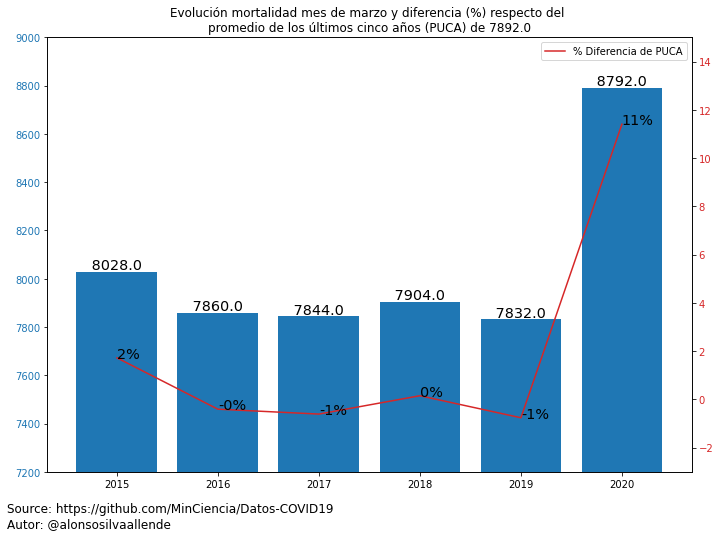

In [0]:
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:blue'
ax1.bar(np.arange(2015,2021),deaths_year_month.loc[2015:2020,3], label="Total")

for i, val in zip(np.arange(2015,2021),deaths_year_month.loc[2015:2020,3]):
  ax1.text(i-0.3, val+10, f" {val:.1f}", fontsize='x-large')

ax1.set_ylim(7200,9000)
#ax1.set_ylim(0,)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(np.arange(2015,2021), dif, color='C3', label="% Diferencia de PUCA")

for i, val in zip(np.arange(2015,2021),dif):
  ax2.text(i, val, f"{val:.0f}%", fontsize='x-large')

ax2.set_ylim(-3,15)
ax2.tick_params(axis='y', labelcolor=color)

plt.legend()
plt.title(f"Evolución mortalidad mes de marzo y diferencia (%) respecto del \npromedio de los últimos cinco años (PUCA) de {PUCA_marzo}")
fig.tight_layout()
plt.annotate('Source: https://github.com/MinCiencia/Datos-COVID19\nAutor: @alonsosilvaallende', (0,0), (-40,-30), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-06-02-plot1.png', bbox_inches='tight', format='png', dvi=2000)
# plt.show()

A lo que el ministro de Ciencia [@acouvecorrea](https://twitter.com/acouvecorrea) responde
https://twitter.com/acouvecorrea/status/1253752475926048768

¿Es el efecto "lunes/fin de semana" real?

In [0]:
data = deaths[["día de la semana", "fallecidos"]].pivot(columns="día de la semana")

In [0]:
data = data.rename(columns={0: "Lunes", 1: "Martes", 2: "Miércoles", 3: "Jueves", 4: "Viernes", 5: "Sábado", 6: "Domingo"})

In [0]:
data.head(10)

fallecidos                                               
día de la semana      Lunes Martes Miércoles Jueves Viernes Sábado Domingo
0                       NaN    NaN       NaN    NaN    88.0    NaN     NaN
1                       NaN    NaN       NaN    NaN     NaN  120.0     NaN
2                       NaN    NaN       NaN    NaN     NaN    NaN    83.0
3                     641.0    NaN       NaN    NaN     NaN    NaN     NaN
4                       NaN  275.0       NaN    NaN     NaN    NaN     NaN
5                       NaN    NaN     284.0    NaN     NaN    NaN     NaN
6                       NaN    NaN       NaN  248.0     NaN    NaN     NaN
7                       NaN    NaN       NaN    NaN   189.0    NaN     NaN
8                       NaN    NaN       NaN    NaN     NaN   85.0     NaN
9                       NaN    NaN       NaN    NaN     NaN    NaN    64.0

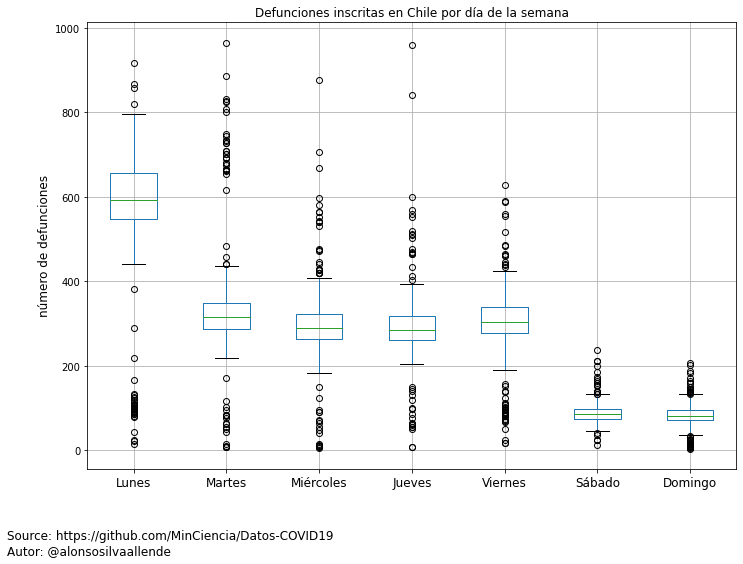

In [0]:
fig, ax = plt.subplots(figsize=(10,7))
data.boxplot(ax=ax)
ax.set_title(f'Defunciones inscritas en Chile por día de la semana', fontsize='large')
ax.set_xlabel(f'', fontsize='large')
ax.set_ylabel(f'número de defunciones', fontsize='large')

ax.set_xticks(np.arange(1,8))
ax.set_xticklabels(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], fontsize="large")
fig.tight_layout()
plt.annotate('Source: https://github.com/MinCiencia/Datos-COVID19\nAutor: @alonsosilvaallende', (0,0), (-80,-60), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-06-02-plot2.png', bbox_inches='tight', format='png', dvi=2000)

In [0]:
data.median() 
# data.mean()

            día de la semana
fallecidos  Lunes               577.117647
            Martes              332.813996
            Miércoles           295.876611
            Jueves              290.515654
            Viernes             304.270221
            Sábado               88.939338
            Domingo              83.987132
dtype: float64

Datos de población (INE): https://www.ine.cl/estadisticas/sociales/demografia-y-vitales/proyecciones-de-poblacion

In [0]:
population = pd.read_csv("http://www.ine.cl/docs/default-source/proyecciones-de-poblacion/cuadros-estadisticos/base-2017/ine_estimaciones-y-proyecciones-de-poblaci%C3%B3n-1992-2050_base-2017_base-de-datos.csv",
                         encoding='ISO-8859-1', sep=";", header=1, thousands='.')

In [0]:
population.query("EDAD=='TOTAL'")

,EDAD,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,...,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119
101,TOTAL,13737062.0,13956766.0,14171821.0,14381249.0,14584947.0,14782706.0,14974898.0,15162353.0,15343326.0,15520049.0,15691701.0,15856977.0,16022133.0,16183489.0,16347890.0,16517933.0,16697754.0,16881078.0,17063927.0,17254159.0,17443491.0,17611902.0,17787617.0,17971423.0,18167147.0,18419192.0,18751405.0,19107216.0,19458310.0,19678363.0,19828563.0,19960889.0,20086377.0,20206953.0,20322807.0,20433791.0,20539666.0,20640230.0,20735289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,TOTAL,6750491.0,6859965.0,6967089.0,7071295.0,7172543.0,7270723.0,7366044.0,7458925.0,7548498.0,7635895.0,7720701.0,7802261.0,7883618.0,7963051.0,8043964.0,8127739.0,8216437.0,8307013.0,8397402.0,8491323.0,8584706.0,8667644.0,8754428.0,8845449.0,8943482.0,9074217.0,9244484.0,9424139.0,9599101.0,9708512.0,9782978.0,9848466.0,9910500.0,9970025.0,10027134.0,10081754.0,10133749.0,10183028.0,10229496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,TOTAL,6986571.0,7096801.0,7204732.0,7309954.0,7412404.0,7511983.0,7608854.0,7703428.0,7794828.0,7884154.0,7971000.0,8054716.0,8138515.0,8220438.0,8303926.0,8390194.0,8481317.0,8574065.0,8666525.0,8762836.0,8858785.0,8944258.0,9033189.0,9125974.0,9223665.0,9344975.0,9506921.0,9683077.0,9859209.0,9969851.0,10045585.0,10112423.0,10175877.0,10236928.0,10295673.0,10352037.0,10405917.0,10457202.0,10505793.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
pop = population.iloc[101]

In [0]:
pop["2019"], pop["2020"]

(19107216.0, 19458310.0)

In [0]:
deaths_original = deaths[["fecha", "fallecidos"]].set_index("fecha")

In [0]:
start_date = "2020-03-01"

In [0]:
pd.to_datetime(start_date)+pd.DateOffset(days=9)

Timestamp('2020-03-10 00:00:00')

In [0]:
deaths_2019 = []
deaths_2020 = []
start_date_2019 = "2019-03-01"
start_date_2020 = "2020-03-01"
for i in np.arange(5):
  start_interval_2019 = pd.to_datetime(start_date_2019)+pd.DateOffset(days=int(0+7*i))
  end_interval_2019 = pd.to_datetime(start_date_2019)+pd.DateOffset(days=int(6+7*i))

  start_interval_2020 = pd.to_datetime(start_date_2020)+pd.DateOffset(days=int(0+7*i))
  end_interval_2020 = pd.to_datetime(start_date_2020)+pd.DateOffset(days=int(6+7*i))

  deaths_2019.append(deaths_original["fallecidos"].loc[start_interval_2019:end_interval_2019].sum())
  deaths_2020.append(deaths_original["fallecidos"].loc[start_interval_2020:end_interval_2020].sum())

In [0]:
deaths_2019

[1820, 1864, 1827, 1899, 1887]

In [0]:
deaths_2020

[1977, 1945, 1982, 1925, 2015]

In [0]:
data = pd.DataFrame()
data[2019] = 1000000*np.array(deaths_2019)/pop["2019"]
data[2020] = 1000000*np.array(deaths_2020)/pop["2020"]

In [0]:
data

,2019,2020
0,95.251972,101.601835
1,97.554767,99.957293
2,95.618326,101.858795
3,99.386535,98.929455
4,98.758500,103.554728


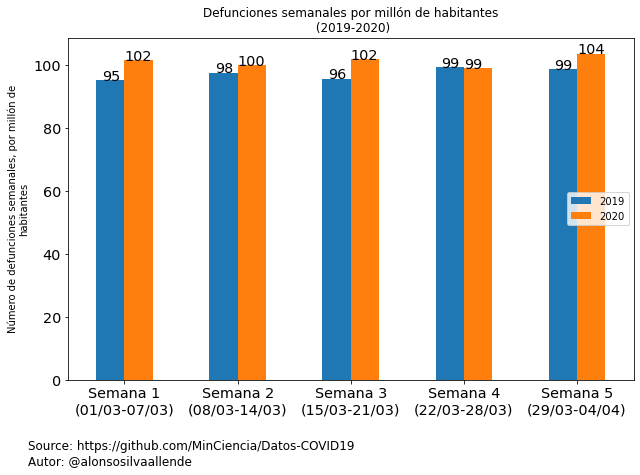

In [0]:
fig, ax = plt.subplots(figsize=(9,6))
data.plot(kind='bar', ax=ax, fontsize='x-large')
for i, val in enumerate(data[2019]):
  ax.text(i-0.2, val, f"{val:.0f}", fontsize='x-large')
for i, val in enumerate(data[2020]):
  ax.text(i, val, f"{val:.0f}", fontsize='x-large')
ax.set_xticks(np.arange(0,5))
ax.set_xticklabels(["Semana 1\n(01/03-07/03)", "Semana 2\n(08/03-14/03)", "Semana 3\n(15/03-21/03)", "Semana 4\n(22/03-28/03)", "Semana 5\n(29/03-04/04)"], rotation=0)
plt.title("Defunciones semanales por millón de habitantes\n (2019-2020)")
plt.legend(loc='right')
ax.set_ylabel("Número de defunciones semanales, por millón de\nhabitantes")
fig.tight_layout()
plt.annotate('Source: https://github.com/MinCiencia/Datos-COVID19\nAutor: @alonsosilvaallende', (0,0), (-40,-60), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-06-02-plot3.png', bbox_inches='tight', format='png', dvi=2000)
#plt.show()

[@datosnomitos](https://twitter.com/datosnomitos) publica el siguiente tweet:
https://twitter.com/datosnomitos/status/1266564809249763332

In [0]:
df_dnm = pd.DataFrame()
for year in np.arange(2015,2021):
  df_dnm[year] = 100000*deaths_year_month.loc[year]/pop[f"{year}"]

In [0]:
df = df_dnm.loc[:,2015:2019].mean(axis=1)

In [0]:
df = df.reset_index().rename(columns={0:"mortalidad media quinquenal"})

In [0]:
df = df.set_index("mes")

In [0]:
df.head()

,mortalidad media quinquenal
mes,
1,45.103587
2,40.993184
3,42.732621
4,44.655276
5,49.007020


In [0]:
df["mortalidad 2020"] = df_dnm.loc[:5,2020]

In [0]:
df["mortalidad 2020"].loc[1:5]

mes
1    47.116116
2    39.448441
3    45.183780
4    45.964937
5    53.077580
Name: mortalidad 2020, dtype: float64

In [0]:
df

,mortalidad media quinquenal,mortalidad 2020
mes,,
1,45.103587,47.116116
2,40.993184,39.448441
3,42.732621,45.183780
4,44.655276,45.964937
5,49.007020,53.077580
6,53.466357,NaN
7,56.936915,NaN
8,54.196927,NaN
9,49.962101,NaN


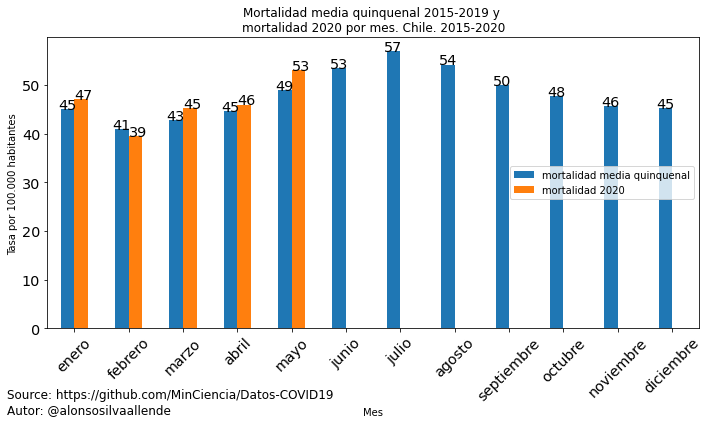

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
df.plot(kind='bar', ax=ax, fontsize='x-large')
for i, val in enumerate(df["mortalidad media quinquenal"]):
  ax.text(i-0.3, val, f"{val:.0f}", fontsize='x-large')
for i, val in enumerate(df["mortalidad 2020"].loc[1:5]):
  ax.text(i, val, f"{val:.0f}", fontsize='x-large')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"], rotation=45)
plt.title("Mortalidad media quinquenal 2015-2019 y \nmortalidad 2020 por mes. Chile. 2015-2020")
plt.legend(loc='right')
ax.set_xlabel("Mes")
ax.set_ylabel("Tasa por 100.000 habitantes")
fig.tight_layout()
plt.annotate('Source: https://github.com/MinCiencia/Datos-COVID19\nAutor: @alonsosilvaallende', (0,0), (-40,-60), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-06-02-plot4.png', bbox_inches='tight', format='png', dvi=2000)
# plt.show()

In [0]:
from google.colab import files
files.download('2020-06-02-plot4.png')

In [0]:
totales_covid19 = pd.read_csv(
    "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv",
    index_col="Fecha")

In [0]:
deaths_covid19 = totales_covid19["Fallecidos"][totales_covid19["Fallecidos"]>0]

In [0]:
deaths_covid19.head(3)

Fecha
2020-03-22    1.0
2020-03-23    1.0
2020-03-24    2.0
Name: Fallecidos, dtype: float64

In [0]:
deaths_covid19.loc["2020-03-31"]

12.0

In [0]:
deaths_covid19.loc["2020-04-30"]

227.0